In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data

,Indicator Name,Temperature,"Population, total","Population ages 75-79, male (% of male population)","Population ages 50-54, male (% of male population)","Population ages 15-64, male (% of male population)","Population ages 00-04, male (% of male population)","Manufacturing, value added (current US$)",Fuel exports (% of merchandise exports),"Industry (including construction), value added (annual % growth)",...,Total greenhouse gas emissions (kt of CO2 equivalent),CO2 emissions from manufacturing industries and construction (% of total fuel combustion),Nitrous oxide emissions in energy sector (% of total),CO2 emissions from solid fuel consumption (kt),Methane emissions in energy sector (thousand metric tons of CO2 equivalent),CO2 emissions (kg per 2015 US$ of GDP),Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent),CO2 emissions (metric tons per capita),CO2 emissions from liquid fuel consumption (% of total),Fertilizer consumption (kilograms per hectare of arable land)
0,1960,29.310000,450547675,0.390467,3.732059,56.688432,16.204903,5.461952e+09,0.552504,5.009395,...,5.523887e+05,33.720345,14.630828,97208.503,29140.52608,0.884239,50759.98900,0.267634,16.139038,1.163182
1,1961,28.720000,459642166,0.418627,3.718648,56.361037,15.946839,6.023684e+09,0.740356,6.712677,...,5.705908e+05,33.829910,14.527666,104956.874,30437.47807,0.921930,51791.75859,0.283704,16.354996,2.171290
2,1962,28.890000,469077191,0.451623,3.687600,55.963334,15.863321,6.688202e+09,0.978182,7.072028,...,5.887930e+05,33.939474,14.424503,114227.050,31734.43005,0.985418,52823.52818,0.305851,17.360188,2.885769
3,1963,29.040000,478825602,0.479031,3.650099,55.581336,15.903784,7.627609e+09,1.016113,9.447275,...,6.069951e+05,34.049039,14.321341,122144.103,33031.38204,0.998482,53855.29777,0.321795,17.606321,3.453991
4,1964,29.090000,488848139,0.491140,3.622096,55.339706,15.953427,8.387741e+09,1.353887,6.479270,...,6.251972e+05,34.158604,14.218179,117167.984,34328.33403,0.908506,54887.06736,0.308169,18.682148,4.901986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2016,31.630000,1324517250,0.920615,4.745885,66.416318,8.901876,3.479430e+11,10.642192,7.720084,...,3.103110e+06,27.985460,5.206068,1516605.194,99590.00000,0.958728,212620.00000,1.648359,29.723916,165.897990
57,2017,31.420000,1338676779,0.935560,4.778806,66.698732,8.753420,3.982050e+11,12.185947,5.860542,...,3.229920e+06,28.463857,5.094980,1576887.740,99340.00000,0.946310,215250.00000,1.719190,28.657253,170.001151
58,2018,31.520000,1352642283,0.950331,4.813565,66.946095,8.676016,4.012030e+11,15.067451,5.310577,...,3.374990e+06,28.942255,4.983891,1623699.196,99080.00000,0.939643,220220.00000,1.799825,29.533452,175.015344
59,2019,31.824643,1366417756,0.966283,4.856128,67.200428,8.616012,3.825650e+11,13.776351,-1.230130,...,3.422230e+06,29.420653,4.872802,1691805.470,97847.50000,0.905379,217528.57140,1.834826,31.249590,169.834300


In [ ]:
df = data.copy()
df = df.rename(columns = {'Indicator Name':'Year'}).set_index(['Year'])
df = df[:-1]

In [ ]:
df

,Temperature,"Population, total","Population ages 75-79, male (% of male population)","Population ages 50-54, male (% of male population)","Population ages 15-64, male (% of male population)","Population ages 00-04, male (% of male population)","Manufacturing, value added (current US$)",Fuel exports (% of merchandise exports),"Industry (including construction), value added (annual % growth)","Agriculture, forestry, and fishing, value added (constant 2015 US$)",...,Total greenhouse gas emissions (kt of CO2 equivalent),CO2 emissions from manufacturing industries and construction (% of total fuel combustion),Nitrous oxide emissions in energy sector (% of total),CO2 emissions from solid fuel consumption (kt),Methane emissions in energy sector (thousand metric tons of CO2 equivalent),CO2 emissions (kg per 2015 US$ of GDP),Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent),CO2 emissions (metric tons per capita),CO2 emissions from liquid fuel consumption (% of total),Fertilizer consumption (kilograms per hectare of arable land)
Year,,,,,,,,,,,,,,,,,,,,,
1960,29.310000,450547675,0.390467,3.732059,56.688432,16.204903,5.461952e+09,0.552504,5.009395,8.390959e+10,...,5.523887e+05,33.720345,14.630828,97208.503,29140.52608,0.884239,50759.98900,0.267634,16.139038,1.163182
1961,28.720000,459642166,0.418627,3.718648,56.361037,15.946839,6.023684e+09,0.740356,6.712677,8.398025e+10,...,5.705908e+05,33.829910,14.527666,104956.874,30437.47807,0.921930,51791.75859,0.283704,16.354996,2.171290
1962,28.890000,469077191,0.451623,3.687600,55.963334,15.863321,6.688202e+09,0.978182,7.072028,8.230980e+10,...,5.887930e+05,33.939474,14.424503,114227.050,31734.43005,0.985418,52823.52818,0.305851,17.360188,2.885769
1963,29.040000,478825602,0.479031,3.650099,55.581336,15.903784,7.627609e+09,1.016113,9.447275,8.423523e+10,...,6.069951e+05,34.049039,14.321341,122144.103,33031.38204,0.998482,53855.29777,0.321795,17.606321,3.453991
1964,29.090000,488848139,0.491140,3.622096,55.339706,15.953427,8.387741e+09,1.353887,6.479270,9.200532e+10,...,6.251972e+05,34.158604,14.218179,117167.984,34328.33403,0.908506,54887.06736,0.308169,18.682148,4.901986
1965,29.160000,499123328,0.486883,3.610869,55.287247,15.942330,8.939724e+09,1.193327,4.525377,8.184591e+10,...,6.433993e+05,34.268169,14.115016,128818.043,35625.28602,1.028019,55918.83695,0.332527,18.581118,4.959043
1966,29.410000,509631509,0.485567,3.592879,55.169053,15.985491,6.652323e+09,1.170544,3.568279,8.068159e+10,...,6.616015e+05,34.377734,14.011854,129404.763,36922.23801,1.064495,56950.60654,0.337039,20.787344,6.939908
1967,29.140000,520400577,0.474485,3.589982,55.244357,15.903124,6.633786e+09,0.835057,3.341438,9.267964e+10,...,6.798036e+05,34.487298,13.908692,131740.642,38219.19000,0.989953,57982.37613,0.330974,18.999361,9.631994
1968,29.070000,531513834,0.462566,3.596559,55.450398,15.739180,7.178634e+09,0.902341,4.726125,9.253295e+10,...,6.980057e+05,34.596863,13.805529,136973.451,39516.14198,1.041441,59014.14572,0.352457,22.571300,10.999631


In [ ]:
df.replace(0, np.nan, inplace=True)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
for x in range(len(df.columns)):
  y = df.iloc[:,x]
  X_t = y[y.isnull()].index.astype(int).tolist()
  y = y.reset_index()
  #y['index'] = y['index'].astype(int)
  y.dropna(inplace=True)
  reg.fit(np.array(y.iloc[:,0]).reshape(-1,1), np.array(y.iloc[:,1]).reshape(-1,1))
  for l in X_t:
    df.iloc[l-1960, x] = float(reg.predict(np.array(l).reshape(1,-1)))

In [ ]:
X = df.copy()
y = pd.DataFrame(df.iloc[:,0], columns=['Temperature'])
df = df.iloc[:,1:]

In [ ]:
y

,Temperature
Year,
1960,29.310000
1961,28.720000
1962,28.890000
1963,29.040000
1964,29.090000
1965,29.160000
1966,29.410000
1967,29.140000
1968,29.070000


In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000)
xgb.fit(df, y)

[11:03:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [ ]:
xgb.feature_importances_

array([1.2179573e-01, 3.0608203e-03, 1.1072939e-02, 2.9923962e-04,
       4.9002366e-03, 1.5477327e-03, 2.0832254e-03, 5.6499038e-03,
       5.4763192e-03, 7.5870543e-04, 1.1997100e-04, 2.7180922e-03,
       0.0000000e+00, 9.0654828e-03, 7.4936715e-03, 5.0839381e-03,
       4.1528330e-03, 2.2528684e-04, 0.0000000e+00, 4.3791789e-03,
       0.0000000e+00, 8.9775389e-03, 1.3170874e-02, 1.2706624e-02,
       1.9417213e-02, 1.9579392e-03, 4.5704446e-04, 4.4079996e-05,
       0.0000000e+00, 4.9687676e-02, 6.1387084e-03, 2.4166272e-06,
       1.8357277e-02, 0.0000000e+00, 2.2386920e-01, 3.1518179e-01,
       0.0000000e+00, 1.9487551e-03, 0.0000000e+00, 0.0000000e+00,
       1.0576133e-02, 3.7425801e-02, 9.6784242e-06, 4.4832050e-04,
       3.9334423e-03, 1.4434348e-05, 1.9358504e-06, 9.0884725e-03,
       7.6701373e-02], dtype=float32)

<BarContainer object of 49 artists>

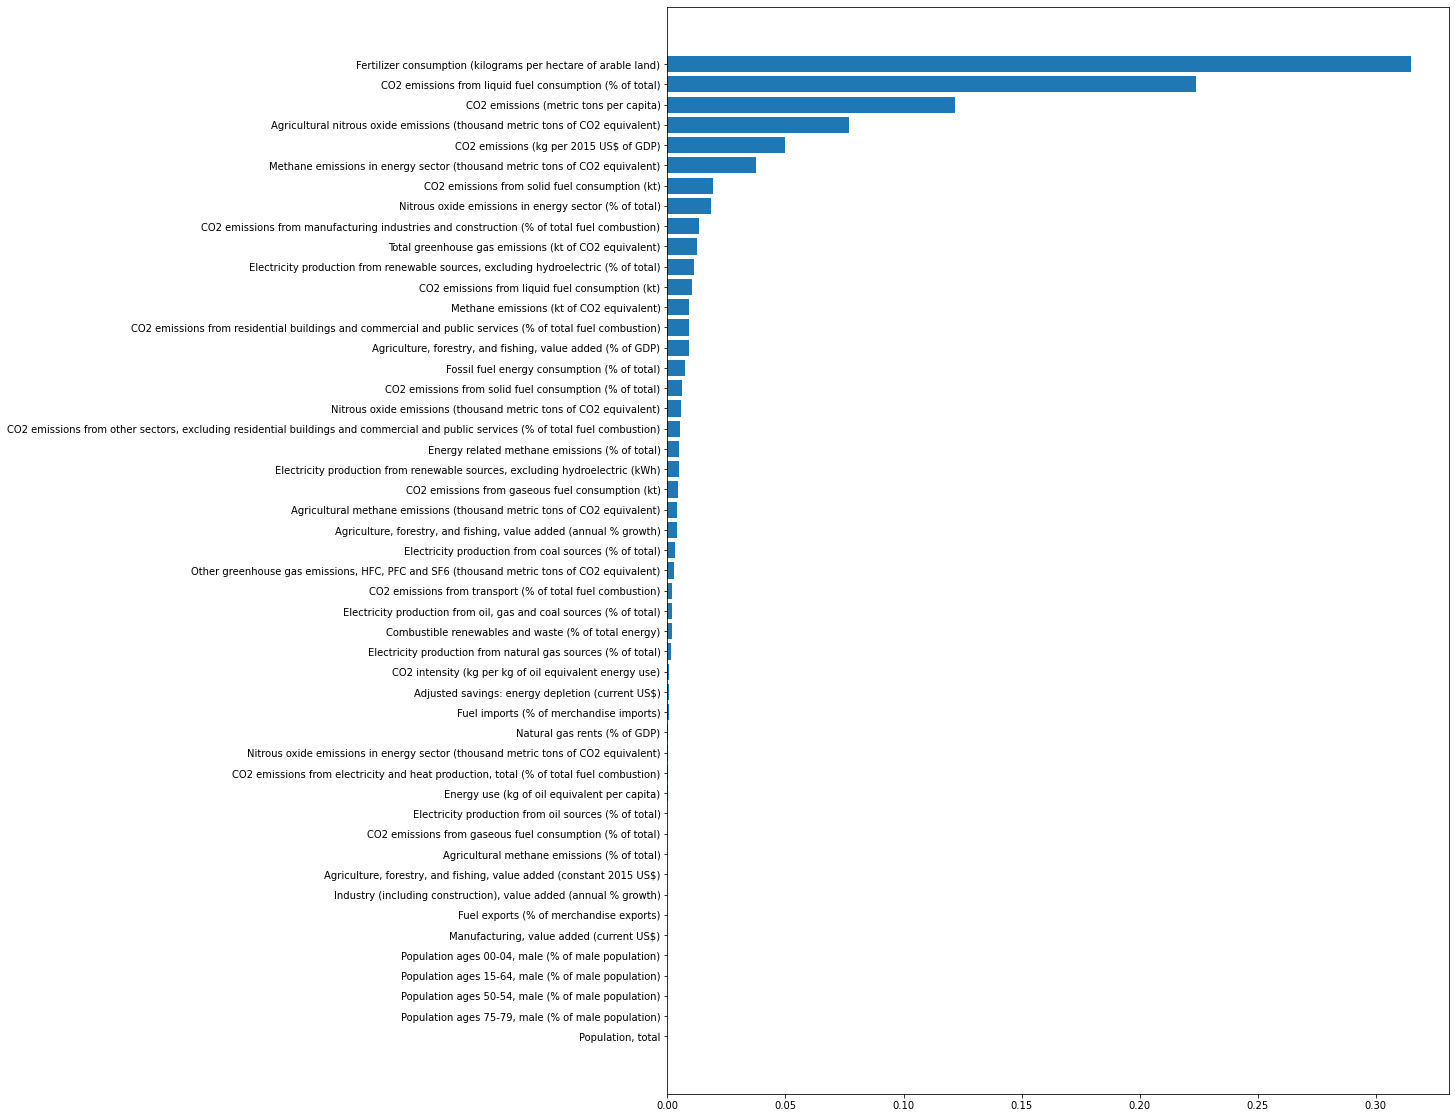

In [ ]:
top = len(df.columns)
sorted_idx = xgb.feature_importances_.argsort()[-top:]
plt.figure(figsize=(14,20))
plt.barh(df.columns, xgb.feature_importances_[sorted_idx])

In [ ]:
Xf = df.iloc[:,list(sorted_idx)]

In [ ]:
Zf = pd.concat([Xf, y], axis=1)
Zf

,Total greenhouse gas emissions (kt of CO2 equivalent),Combustible renewables and waste (% of total energy),"Electricity production from renewable sources, excluding hydroelectric (% of total)",CO2 intensity (kg per kg of oil equivalent energy use),"Electricity production from renewable sources, excluding hydroelectric (kWh)",Fossil fuel energy consumption (% of total),Energy use (kg of oil equivalent per capita),Methane emissions (kt of CO2 equivalent),CO2 emissions (metric tons per capita),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),...,CO2 emissions from transport (% of total fuel combustion),CO2 emissions from solid fuel consumption (% of total),Electricity production from coal sources (% of total),Nitrous oxide emissions in energy sector (% of total),Energy related methane emissions (% of total),Fertilizer consumption (kilograms per hectare of arable land),"Population, total","Agriculture, forestry, and fishing, value added (% of GDP)",CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion),Temperature
Year,,,,,,,,,,,,,,,,,,,,,
1960,5.523887e+05,69.574055,0.000981,1.085819,2.000000e+06,29.681615,237.726059,344383.1538,0.267634,51119.30812,...,29.336474,80.616124,51.216177,14.630828,9.939015,1.163182,450547675,41.312839,15.444108,29.310000
1961,5.705908e+05,69.012335,0.000981,1.110498,2.000000e+06,30.156650,240.249432,349370.2692,0.283704,54268.13218,...,28.845546,80.487050,51.214303,14.527666,10.033772,2.171290,459642166,40.387402,15.307597,28.720000
1962,5.887930e+05,68.450616,0.000981,1.135177,2.000000e+06,30.631685,242.772804,354357.3846,0.305851,57416.95624,...,28.354618,79.618648,51.212428,14.424503,10.128529,2.885769,469077191,38.371335,15.171085,28.890000
1963,6.069951e+05,67.888896,0.000981,1.159855,2.000000e+06,31.106720,245.296177,359344.5000,0.321795,60565.78030,...,27.863689,79.271282,51.210554,14.321341,10.223286,3.453991,478825602,39.319751,15.034574,29.040000
1964,6.251972e+05,67.327176,0.000981,1.184534,2.000000e+06,31.581755,247.819549,364331.6154,0.308169,63714.60436,...,27.372761,77.776155,51.208680,14.218179,10.318043,4.901986,488848139,41.187738,14.898063,29.090000
1965,6.433993e+05,66.765457,0.000981,1.209213,2.000000e+06,32.056790,250.342921,369318.7308,0.332527,66863.42842,...,26.881832,77.614282,51.206805,14.115016,10.412800,4.959043,499123328,38.952143,14.761552,29.160000
1966,6.616015e+05,66.203737,0.000981,1.233892,2.000000e+06,32.531825,252.866294,374305.8462,0.337039,70012.25248,...,26.390904,75.337845,51.204931,14.011854,10.507558,6.939908,509631509,40.025448,14.625040,29.410000
1967,6.798036e+05,65.642017,0.000981,1.258570,2.000000e+06,33.006860,255.389666,379292.9615,0.330974,73161.07655,...,25.899976,76.487119,51.203057,13.908692,10.602315,9.631994,520400577,42.767622,14.488529,29.140000
1968,6.980057e+05,65.080297,0.000981,1.283249,2.000000e+06,33.481895,257.913038,384280.0769,0.352457,76309.90061,...,25.409047,73.116448,51.201183,13.805529,10.697072,10.999631,531513834,41.633551,14.352018,29.070000


In [ ]:
!pip install dowhy
!pip install econml

In [ ]:
import econml
import dowhy
from dowhy import CausalModel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV

In [ ]:
def mapSolve(u, Zf, t, o):
  Zfc = Zf.corr()
  thr = ((Zf.corr()**2).sum().sum())**0.5/top
  tc = Zfc[t].drop([o,t]).index[abs(Zfc[t].drop([o,t]))>thr].tolist()
  oc = Zfc[o].drop([o,t]).index[abs(Zfc[o].drop([o,t]))>thr].tolist()
  coml = []
  insl = []
  for f in tc:
    if f in oc:
      coml.append(f)
    else:
      insl.append(f)
  model=CausalModel(
        data = Zf,
        treatment= t,
        outcome= o,
        common_causes=coml,
        instruments = insl,
        )
  #model.view_model(layout="dot")
  plt.show()
  identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
  dml_estimate = model.estimate_effect(identified_estimand,
                                    method_name="backdoor.econml.dml.DML",
                                    method_params={
                                        'init_params': {'model_y': GradientBoostingRegressor(),
                                                        'model_t': GradientBoostingRegressor(),
                                                        'model_final':LassoCV(fit_intercept=False), 'cv':21},
                                        'fit_params': {}
                                     })
  return(dml_estimate.value)

In [ ]:
r = []
for u in range(0,top):
  r.append([Xf.columns[u], mapSolve(u, Zf, Xf.columns[u], y.columns[0])])

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

In [ ]:
rf = pd.DataFrame(r, columns=["NAME", "CE"])
rf[rf["CE"]>0.02].sort_values(by=["CE"], ascending=False)

,NAME,CE
36,CO2 emissions from liquid fuel consumption (% ...,0.068327
34,"Electricity production from oil, gas and coal ...",0.055755
26,Fuel imports (% of merchandise imports),0.020711


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
X

,Temperature,"Population, total","Population ages 75-79, male (% of male population)","Population ages 50-54, male (% of male population)","Population ages 15-64, male (% of male population)","Population ages 00-04, male (% of male population)","Manufacturing, value added (current US$)",Fuel exports (% of merchandise exports),"Industry (including construction), value added (annual % growth)","Agriculture, forestry, and fishing, value added (constant 2015 US$)",...,Total greenhouse gas emissions (kt of CO2 equivalent),CO2 emissions from manufacturing industries and construction (% of total fuel combustion),Nitrous oxide emissions in energy sector (% of total),CO2 emissions from solid fuel consumption (kt),Methane emissions in energy sector (thousand metric tons of CO2 equivalent),CO2 emissions (kg per 2015 US$ of GDP),Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent),CO2 emissions (metric tons per capita),CO2 emissions from liquid fuel consumption (% of total),Fertilizer consumption (kilograms per hectare of arable land)
Year,,,,,,,,,,,,,,,,,,,,,
1960,29.310000,450547675,0.390467,3.732059,56.688432,16.204903,5.461952e+09,0.552504,5.009395,8.390959e+10,...,5.523887e+05,33.720345,14.630828,97208.503,29140.52608,0.884239,50759.98900,0.267634,16.139038,1.163182
1961,28.720000,459642166,0.418627,3.718648,56.361037,15.946839,6.023684e+09,0.740356,6.712677,8.398025e+10,...,5.705908e+05,33.829910,14.527666,104956.874,30437.47807,0.921930,51791.75859,0.283704,16.354996,2.171290
1962,28.890000,469077191,0.451623,3.687600,55.963334,15.863321,6.688202e+09,0.978182,7.072028,8.230980e+10,...,5.887930e+05,33.939474,14.424503,114227.050,31734.43005,0.985418,52823.52818,0.305851,17.360188,2.885769
1963,29.040000,478825602,0.479031,3.650099,55.581336,15.903784,7.627609e+09,1.016113,9.447275,8.423523e+10,...,6.069951e+05,34.049039,14.321341,122144.103,33031.38204,0.998482,53855.29777,0.321795,17.606321,3.453991
1964,29.090000,488848139,0.491140,3.622096,55.339706,15.953427,8.387741e+09,1.353887,6.479270,9.200532e+10,...,6.251972e+05,34.158604,14.218179,117167.984,34328.33403,0.908506,54887.06736,0.308169,18.682148,4.901986
1965,29.160000,499123328,0.486883,3.610869,55.287247,15.942330,8.939724e+09,1.193327,4.525377,8.184591e+10,...,6.433993e+05,34.268169,14.115016,128818.043,35625.28602,1.028019,55918.83695,0.332527,18.581118,4.959043
1966,29.410000,509631509,0.485567,3.592879,55.169053,15.985491,6.652323e+09,1.170544,3.568279,8.068159e+10,...,6.616015e+05,34.377734,14.011854,129404.763,36922.23801,1.064495,56950.60654,0.337039,20.787344,6.939908
1967,29.140000,520400577,0.474485,3.589982,55.244357,15.903124,6.633786e+09,0.835057,3.341438,9.267964e+10,...,6.798036e+05,34.487298,13.908692,131740.642,38219.19000,0.989953,57982.37613,0.330974,18.999361,9.631994
1968,29.070000,531513834,0.462566,3.596559,55.450398,15.739180,7.178634e+09,0.902341,4.726125,9.253295e+10,...,6.980057e+05,34.596863,13.805529,136973.451,39516.14198,1.041441,59014.14572,0.352457,22.571300,10.999631


In [ ]:
grangercausalitytests(X.iloc[:,[0,u]].pct_change().dropna(),5)[2][0]['ssr_ftest'][1]


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0628  , p=0.8030  , df_denom=55, df_num=1
ssr based chi2 test:   chi2=0.0663  , p=0.7969  , df=1
likelihood ratio test: chi2=0.0662  , p=0.7969  , df=1
parameter F test:         F=0.0628  , p=0.8030  , df_denom=55, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0637  , p=0.9384  , df_denom=52, df_num=2
ssr based chi2 test:   chi2=0.1395  , p=0.9326  , df=2
likelihood ratio test: chi2=0.1394  , p=0.9327  , df=2
parameter F test:         F=0.0637  , p=0.9384  , df_denom=52, df_num=2


In [ ]:
css = []
for u in range(1, len(X.columns)):
  p = grangercausalitytests(X.iloc[:,[0,u]].pct_change().dropna(),5)
  for cs in range(1,6):
    if p[cs][0]['ssr_ftest'][1]<0.05:
      css.append([X.columns[u], cs])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3134  , p=0.1340  , df_denom=55, df_num=1
ssr based chi2 test:   chi2=2.4396  , p=0.1183  , df=1
likelihood ratio test: chi2=2.3897  , p=0.1221  , df=1
parameter F test:         F=2.3134  , p=0.1340  , df_denom=55, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4542  , p=0.0958  , df_denom=52, df_num=2
ssr based chi2 test:   chi2=5.3804  , p=0.0679  , df=2
likelihood ratio test: chi2=5.1414  , p=0.0765  , df=2
parameter F test:         F=2.4542  , p=0.0958  , df_denom=52, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4826  , p=0.2308  , df_denom=49, df_num=3
ssr based chi2 test:   chi2=5.0834  , p=0.1658  , df=3
likelihood ratio test: chi2=4.8657  , p=0.1819  , df=3
parameter F test:         F=1.4826  , p=0.2308  , df_denom=49, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2016  , p=0.3230  , df_d

In [ ]:
css

[['Fossil fuel energy consumption (% of total)', 1],
 ['Fossil fuel energy consumption (% of total)', 2],
 ['CO2 emissions from liquid fuel consumption (kt)', 1],
 ['CO2 emissions from liquid fuel consumption (kt)', 2],
 ['CO2 emissions from manufacturing industries and construction (% of total fuel combustion)',
  1],
 ['CO2 emissions from solid fuel consumption (kt)', 4],
 ['CO2 emissions from solid fuel consumption (kt)', 5],
 ['Methane emissions in energy sector (thousand metric tons of CO2 equivalent)',
  5],
 ['CO2 emissions (kg per 2015 US$ of GDP)', 4],
 ['CO2 emissions from liquid fuel consumption (% of total)', 1],
 ['CO2 emissions from liquid fuel consumption (% of total)', 2],
 ['CO2 emissions from liquid fuel consumption (% of total)', 3],
 ['CO2 emissions from liquid fuel consumption (% of total)', 4],
 ['CO2 emissions from liquid fuel consumption (% of total)', 5]]